# Project - Applied Statistics

### Objective:
#### Want to see if we can dive deep into this data to find some valuable insights

### 1.Importing the necessary libraries (2 marks):

In [1]:
import numpy as np # For doing algebric/mathematical calculation/operations.
import pandas as pd # For creating, analyzing/dataprocessing dataframes. 
import matplotlib.pyplot as plt # For visualization of data.
%matplotlib inline
import seaborn as sns         # For visualization of data.
import scipy.stats as stats   # To perform statistical analysis.
import statsmodels.api as sm  # To perform ANOVA.
from statsmodels.formula.api import ols  # To perform ordinary least squares method to fit a model to the formula and dataframe.
from scipy.stats import ttest_1samp, ttest_ind, f  #To perform t-test for one sample, two samples independent and related.
from statsmodels.stats.power import ttest_power    # To understand the power of test based on the level of significance.
from statsmodels.stats.proportion import proportions_ztest # To Perform proportion test.
sns.set(color_codes=True) # To set color codes for the data visualization.

### 2.Read the data as a data frame (2 marks):

In [2]:
df = pd.read_csv('insurance (1).csv') # input the CSV-file (reading the data as dataframe).
df.head(10) # Returns N rows of the data in the input CSV file

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
type(df) # To know the data type of the variable df.

pandas.core.frame.DataFrame

#### Therfore Data is read as a DataFrame

### 3. Perform basic EDA which should include the following and print out your insights at every step. (28 marks)

#### a. Shape of the data (2 marks)

In [7]:
df.shape # Gives the shpe of the DataFrame

(1338, 7)

##### Infernce on the above output:
The DataFrame Contains 1338 rows (indexed as 0 to 1337) and 7 columns(attributes).

================================================================================================================

#### b.Data type of each attribute (2 marks)

In [10]:
df.info() # Give all the informations regarding the no.of entries, no.of columns, dtatype of each attribute and memory size of that dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### Infernce on the above output:
The DataFrame contans 7 attributes. 2 integer type, 2 float type and 3 object type(Strings in the column)
##### Following attributes belong to  Nominal Category:
1. sex           
2. smoker     
3. region     
 

================================================================================================================

#### c. Checking the presence of missing values (3 marks)

This can be done using functions like df.isnull or df.isna or df.notna

In [15]:
df.isnull() #Detects missing values and shows the field with missing values as True and non-missing values as False.

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [13]:
df.isna() #Detects missing values and shows the field with missing values as True and non-missing values as False.

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [16]:
df.notna() #Detects missing values and shows the field with missing values as False and non-missing values as True.

,age,sex,bmi,children,smoker,region,charges
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
1333,True,True,True,True,True,True,True
1334,True,True,True,True,True,True,True
1335,True,True,True,True,True,True,True
1336,True,True,True,True,True,True,True


  ##### Infernce on the above output:
  Here all fields are filled with values there are no missing values. 1338 rows × 7 columns are filled therefore it is not necessary to use function like df.dropna() to clean the Nan/Null data or df.fillna() to fill the missing values.

================================================================================================================

#### d. 5 point summary of numerical attributes (3 marks):
The Five point summary are:
1. Maximum value
2. 25% quartile
3. Median(50% quartile)
4. 75% quartile
5. Minimum value
    
The above mentioned five points for numerical attributes in the dataframe along with the other descriptive statistics are also available below.

In [34]:
df.describe().T # This function gives descriptive statistics of the numerical attributes which includes five points mentioned above. 

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


##### Infernce on the above output:
Five point summary can be taken from the above displayed table.
For eg let us take attribute age:
 1. min - 18 years old.
 2. 25% quartiles - 27years old.
 3. 50% quartiles(median) - 39years old.
 4. 75% quartiles - 51years old.
 5. max - 64 years old. 
   
     similarly it can be done for all the other numerical vriables.
 
    From the above table we can infer central tendancy and measure of dispersion:
 For eg let us take attribute age:
  1. Measure of central tendancy here is medain(50%) - 39 years old
  2. Measure of Dispersion:
     
     a. Range: Max-Min = 46 years of deviation
     
     b. Inter Quartile Range: (75% quartiles) - (25% quartiles) = 24 years of deviation

#### The five point summary can also be visualized using the boxplot where the left end and right end of the whiskers represnt the min and max values respectively, the box represent 25%, 50%(median) and 75% quartiles.

Box plot for the same is displayed below

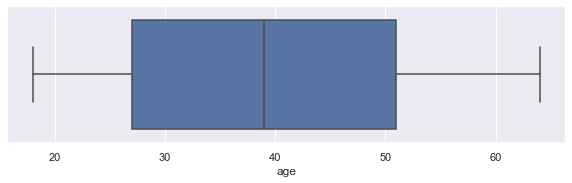

In [162]:
plt.figure(figsize=(10,2.5)) # To set the plot size.
sns.boxplot(df['age']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.


##### Inference for the above plot:
1. The left end and right end of the whiskers represnt the min(18 years old) and max(64 years old) values respectively.
2. The box represent 25% quartiles - 27years old, 50% quartiles(median)- 39years old and 75% quartiles- 51years old

================================================================================================================

#### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. (4 marks):

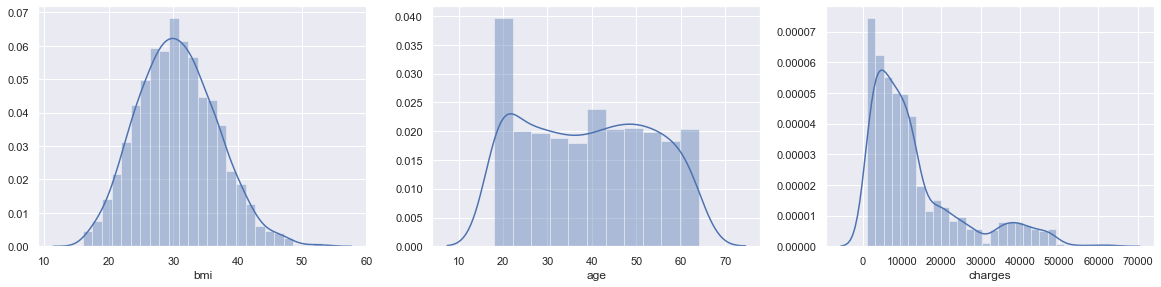

In [163]:
# To visualize the distribution of the data here I use distplot function with Kernel density estimation of seaborn package
plt.figure(figsize= (20,15)) # To set the plot size.
plt.subplot(3,3,1)           # Here subplot function is used to arrange the plots withn a line. 
sns.distplot(df['bmi'])      # distplot fuction is used here to visualize the distribution of the data with kernel density estiamation.

plt.subplot(3,3,2)           # Here subplot function is used to arrange the plots withn a line.
sns.distplot(df['age'])      # distplot fuction is used here to visualize the distribution of the age data with kernel density estiamation.

plt.subplot(3,3,3)           # Here subplot function is used to arrange the plots withn a line.
sns.distplot(df['charges'])  # distplot fuction is used here to visualize the distribution of the charges data with kernel density estiamation.

##### Inference on distribution from the plot:
1. BMI distribution plot - Perfectly Normally Distributed.
2. Age distribution plot - Uniform Distibution or bimodal.
3. Charges distribution plot - Non-Normal Distribution because data is Right Skewed. 

================================================================================================================

#### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns (2 marks)

In [89]:
# Here I use Skew function from Scipy.stats package to measure skewness
bmi = stats.skew(df['bmi']) 
age = stats.skew(df['age'])
charges = stats.skew(df['charges'])
#Creating DataFrame for the output
Skewness = pd.DataFrame({'bmi_skew' : bmi, 'age_skew': age, 'characters_skew': charges},index=['Skewness'])
Skewness

,bmi_skew,age_skew,characters_skew
Skewness,0.283729,0.05561,1.51418


##### Infernce on the above output:
1. bmi_skew is almost close to zero therfore the distribution is equal to normal distribution but slighly right tailed.
2. age_skew appears apporx to zero it is not a perfect normal distribution because based on the visualization done previousy  it is bimodal or  uniform dstribution.
3. characters_skew is >1 so the distribution is highly right tailed therefor it is right skewed. 

================================================================================================================

#### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns (4 marks):
This can be done in many ways as follows:
1. Box Plot
2. Z-score method
3. IQR methods
and many more....

But here only boxplot is used to check the presence of outliers.

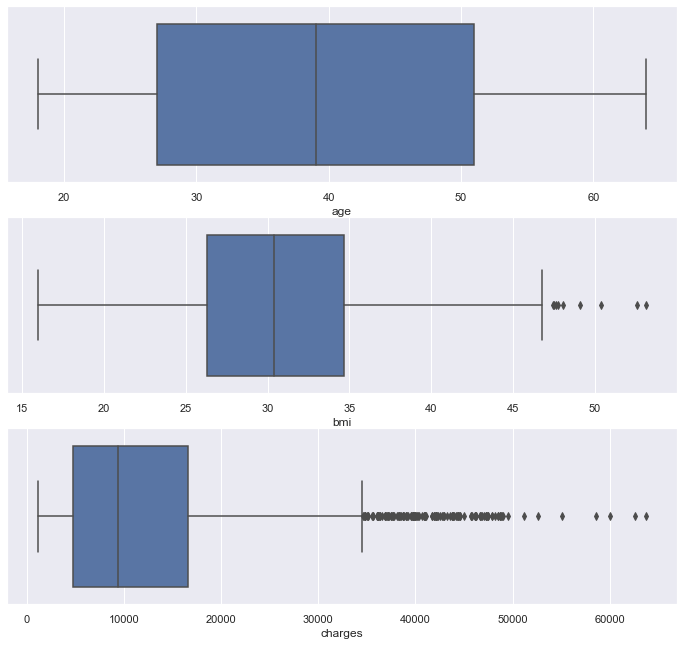

In [102]:
plt.figure(figsize=(12,11)) # To set the plot size.

plt.subplot(3,1,1)          # Here subplot function is used to arrange the plots.
sns.boxplot(df['age'])      # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.

plt.subplot(3,1,2)
sns.boxplot(df['bmi'])


plt.subplot(3,1,3)
sns.boxplot(df['charges'])


##### Infernce on the above output:
1. Age dont have any outliers.
2. BMI have few outliers.
3. Charges have many outliers with data highly skewed.

##### Removing Outliers:

In [36]:
Q1 = df.quantile(0.25) #Quantile 1
Q3 = df.quantile(0.75) #Quantile 2
IQR = Q3 - Q1  #Inter Quantile Range
print('Inter Quantile Range:')
print(IQR)
print('\n')
print('')
print((df< (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
#Removing the Outliers
df_out = pd.DataFrame(df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)])#Extracts the elements that are true alone, (that is) extracting the elements that matches the given condition alone and storing in different variable.
print('\n', df_out)

Inter Quantile Range:
age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64



        age    bmi  charges  children  region    sex  smoker
0     False  False    False     False   False  False   False
1     False  False    False     False   False  False   False
2     False  False    False     False   False  False   False
3     False  False    False     False   False  False   False
4     False  False    False     False   False  False   False
...     ...    ...      ...       ...     ...    ...     ...
1333  False  False    False     False   False  False   False
1334  False  False    False     False   False  False   False
1335  False  False    False     False   False  False   False
1336  False  False    False     False   False  False   False
1337  False  False    False     False   False  False   False

[1338 rows x 7 columns]

       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         

##### Inference on the above output:
1. The size of the data frame with outliers: 1338 rows x 7 columns
2. The size of the data frame after removing outliers:  1193 rows x 7 columns

================================================================================================================

#### h. Distribution of categorical columns (include children) (4 marks):
 To find the distribution of categorical variables Count plot is used from seaborn package.

Text(0.5, 1.0, 'Title: Region Distribution')

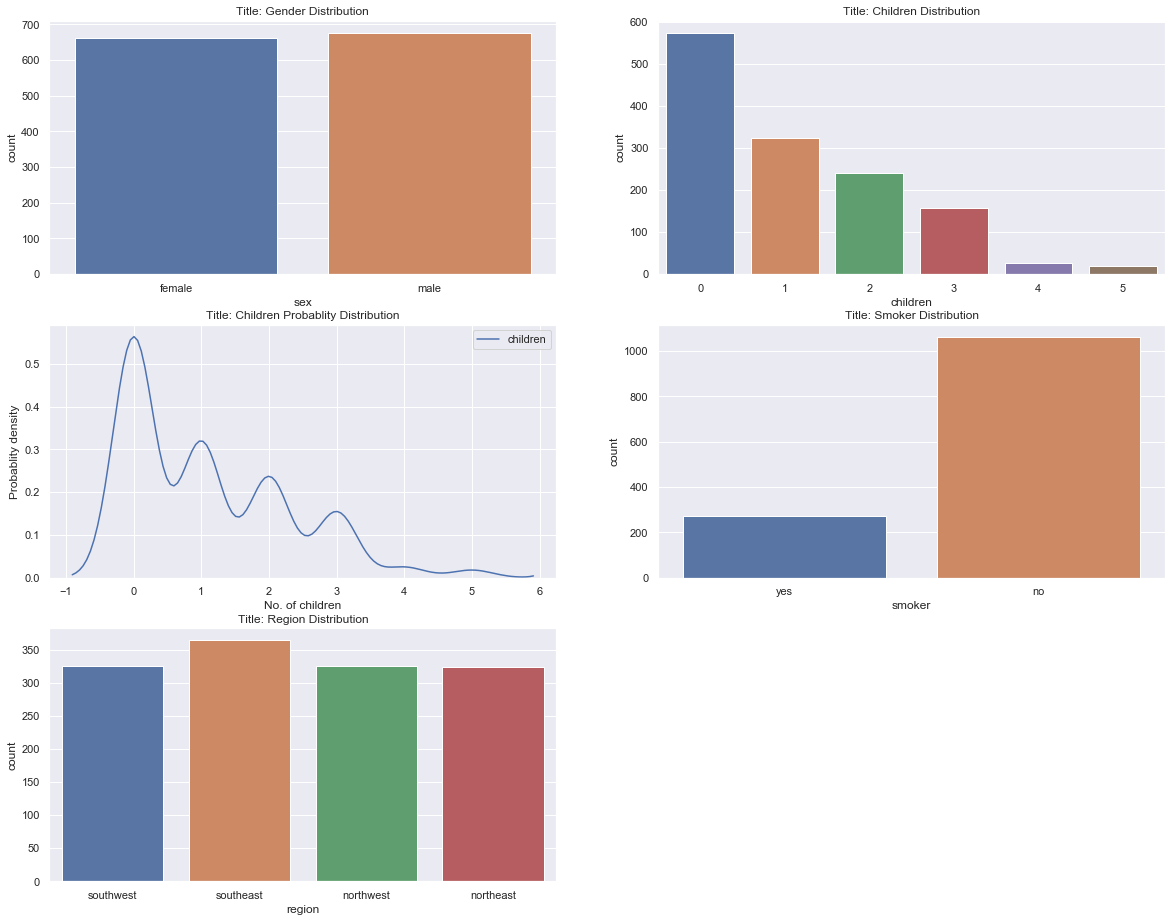

In [171]:
plt.figure(figsize=(20,27))  # To set the plot size.

plt.subplot(5,2,1)          # Here I use subplot function to arrange the plots.
sns.countplot(df['sex'])    # To see the distribution of the categorical varable sex of the dataframe df.
plt.title('Title: Gender Distribution')

plt.subplot(5,2,2)
sns.countplot(df['children']) # To see the distribution of the discrete varable children of the dataframe df.
plt.title('Title: Children Distribution')
plt.subplot(5,2,3)
sns.kdeplot(df['children'])  # This Plot will give Kernel Density Estmation plot through which we can picturize the type of distribution.
plt.xlabel('No. of children')
plt.ylabel('Probablity density')
plt.title('Title: Children Probablity Distribution')

plt.subplot(5,2,4)
sns.countplot(df['smoker'])   # To see the distribution of the categorical varable smoker of the dataframe df.
plt.title('Title: Smoker Distribution')

plt.subplot(5,2,5)
sns.countplot(df['region'])   # To see the distribution of the categorical varable region of the dataframe df.
plt.title('Title: Region Distribution')

##### Infernce on the above output:
1. Distribution of Gender: There are almost equal number of men and women.
2. Distribution of Age in countplot and KDE plot : When looking into these it can be infered that as the age increses no.of peoplecount also decreases where as in kernel density estimation it can be seen that probablity density also decreases as no.of children decreases and becaue of the discrete nature of the variable KDE appears to be Multimodal.
3. Distribution of Smoker: Non smokers > Smokers
4. Distribution of region: Except Southwest category all other seem to have equal count.

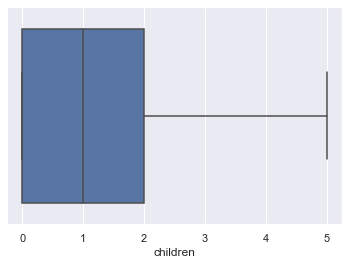

In [11]:
#The Children attribute of the Data Frame df is a dscrete numerical variable, its distribution can also be visualized using boxplot.
sns.boxplot(df['children'])

##### Infernce on the above output:
    The boxplot also shows that the data is right skewed.

================================================================================================================

#### i. Pair plot that includes all the columns of the data frame (4 marks):


##### Method 1:
Function to solve this question is using pairplot() function from the seaborn package but the pairplot plots the columns that are only numerical and skips plotting of the columns with strings. Therefore to include all the columns in the pairplot. The numerical values were assigned to the strings based on the order of number of occurences of strings in their respective columns.

In [9]:
ddf_duplicate1 = df.copy()
ddf_duplicate1['region'] = ddf_duplicate1['region'].replace({ 'southeast' : 1, 'southwest' : 2 , 'northwest' : 3, 'northeast' : 4})
ddf_duplicate1['smoker'] = ddf_duplicate1['smoker'].replace({ 'no' : 1, 'yes' : 2})
ddf_duplicate1['sex'] = ddf_duplicate1['sex'].replace({'male': 1,'female' : 2})
ddf_duplicate1

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,2,2,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,3,21984.47061
4,32,1,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,3,10600.54830
1334,18,2,31.920,0,1,4,2205.98080
1335,18,2,36.850,0,1,1,1629.83350
1336,21,2,25.800,0,1,2,2007.94500


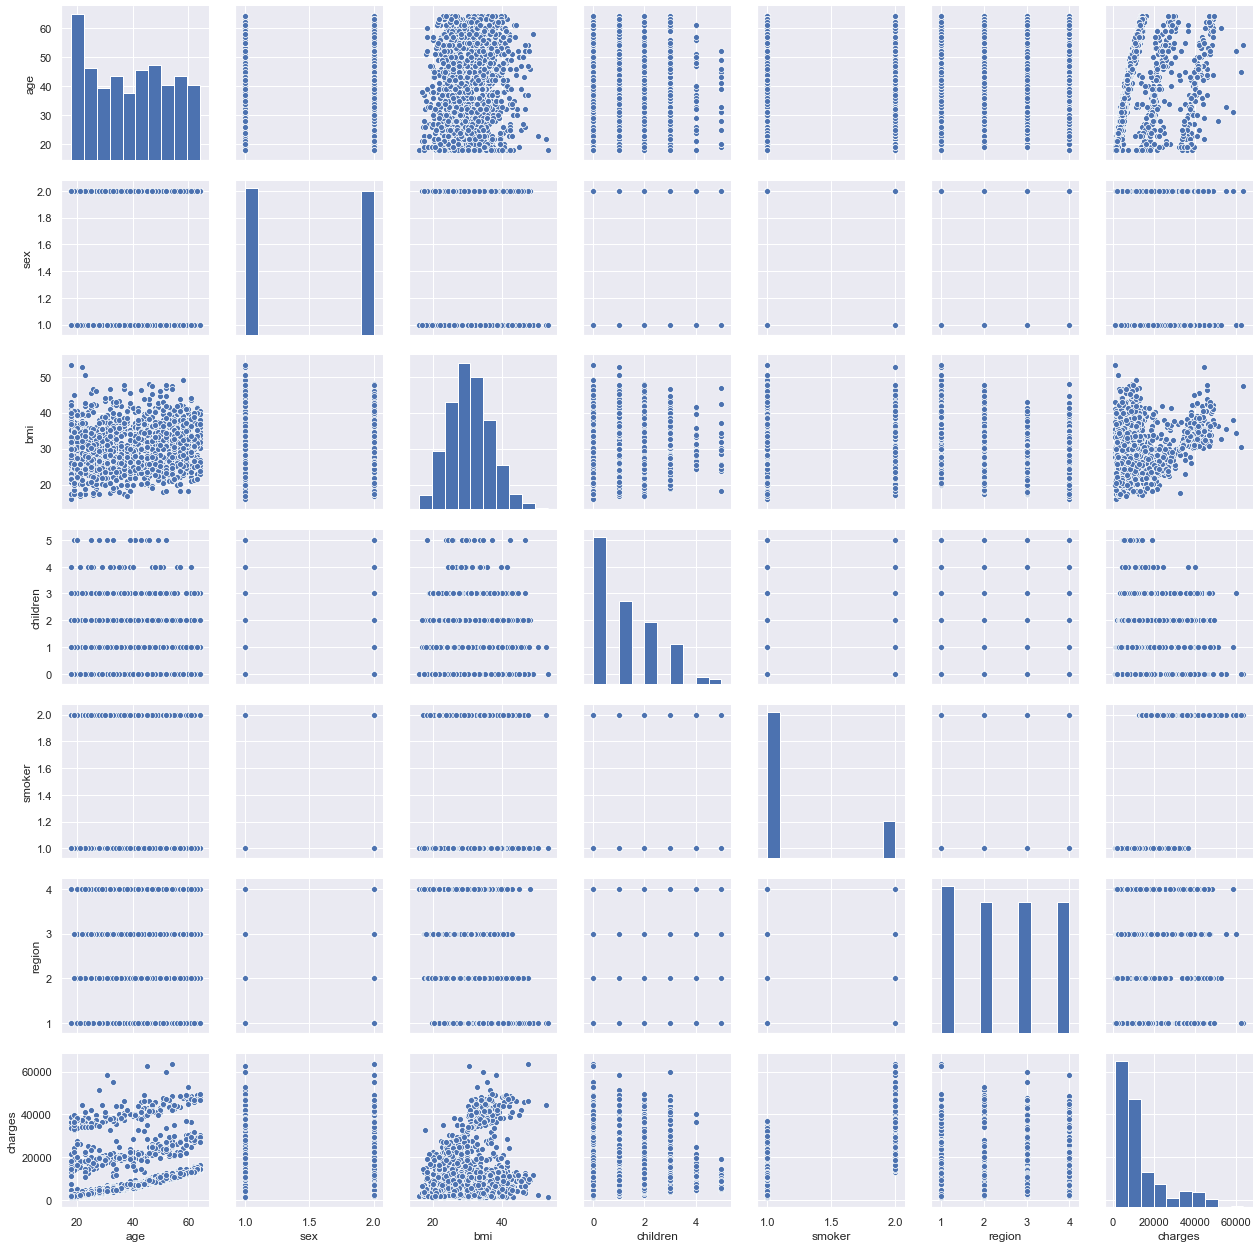

In [11]:
sns.pairplot(ddf_duplicate1) #Paitplot for all the columns is displayed using pairplot function from seaborn package. 

#### Method 2:
Function to solve this question is using pairplot() function from the seaborn package but the pairplot plots the columns that are only numerical and skips plotting of the columns with strings. Therefore to include all the columns in the pairplot the dataframe was recopied as a new csv file (insurance (2).csv) which is read here as "df_duplicate" and the strings in the respective columns were assigned numerical values. 

   The numerical values were assigned to the strings based on the order of number of occurences of strings in their respective columns.

In [13]:
df_duplicate = pd.read_csv('insurance (2).csv') # Reading the new CSV file modified for Pairplot
df_duplicate # Printing the New dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,2,2,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,3,21984.47061
4,32,1,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,3,10600.54830
1334,18,2,31.920,0,1,4,2205.98080
1335,18,2,36.850,0,1,1,1629.83350
1336,21,2,25.800,0,1,2,2007.94500


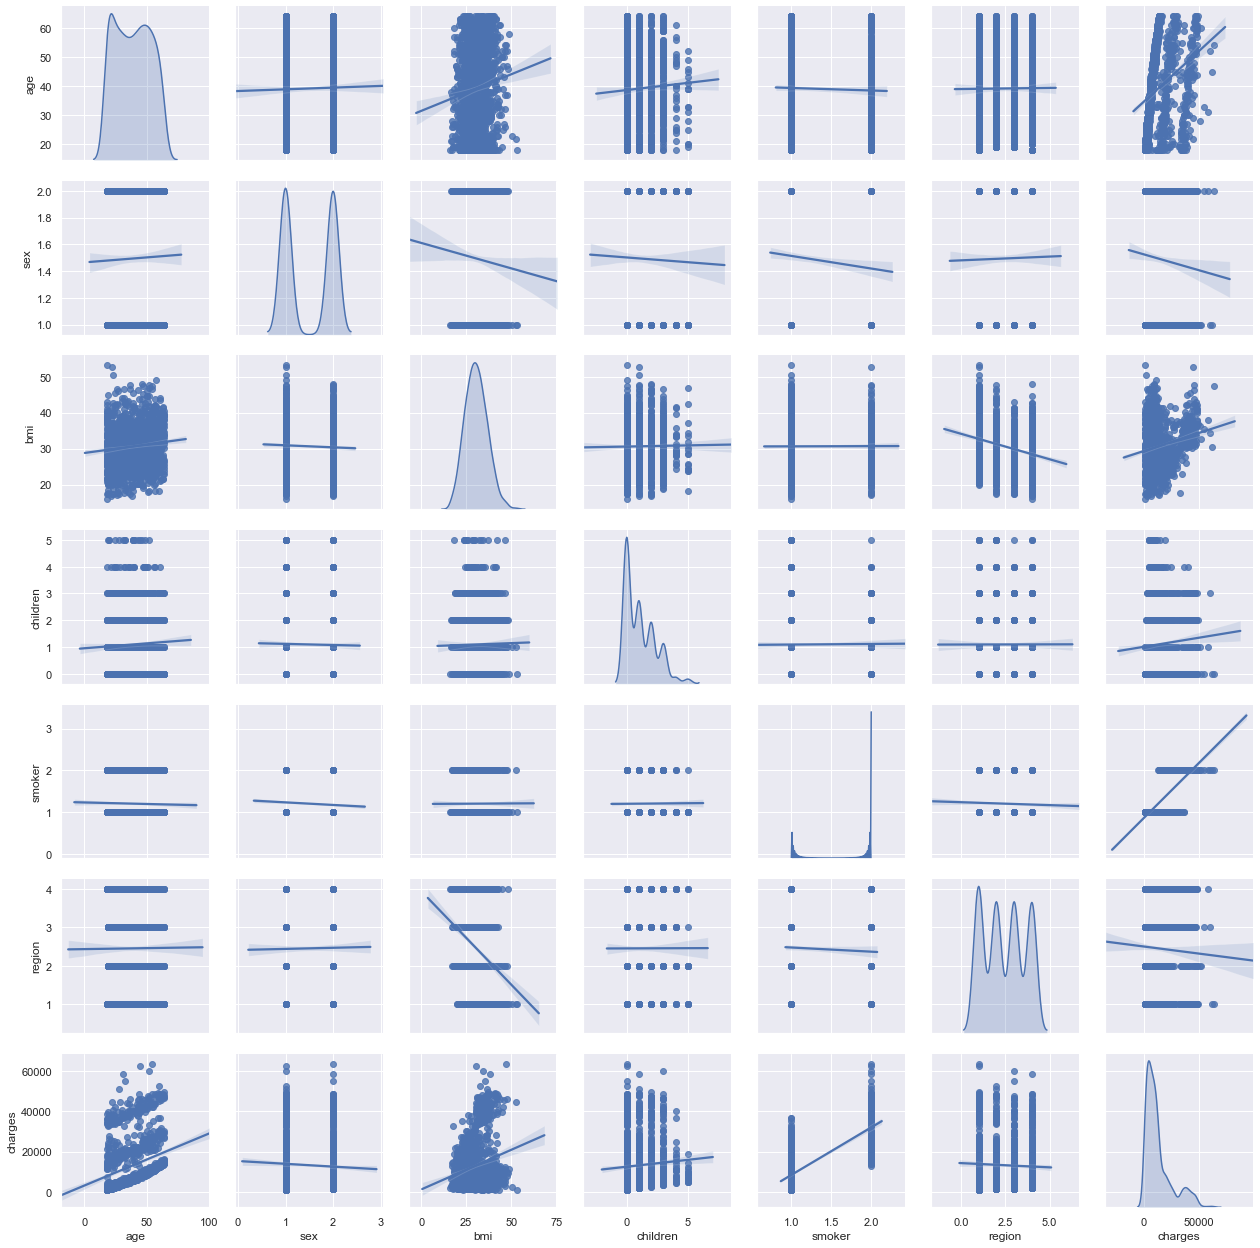

In [16]:
#to identify strong correlation among variables
sns.pairplot(df_duplicate,kind= 'reg',diag_kind='kde') #Paitplot for all the columns is displayed using pairplot function from seaborn package. 

##### Infernce on the above outputs:

1. The above Pairplot displays univariate analysis of induvidual columns in form of histogram.
2. The plots below and above the univariate plots(diagonal) can be seen as upper and lower triangle, the plots in both the upper and lower triangle are the same.
3. The plots in the upper and lower triangeles are bivariate analysis represented using the Scatter plot.


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


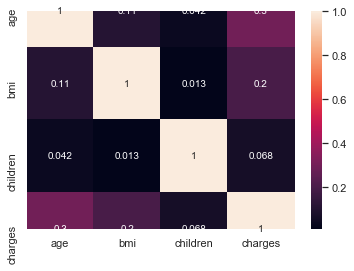

In [7]:
a=df.corr()
sns.heatmap(a,annot=True)
a

##### Infernce on the above outputs:
1. Th above table shows the correlation between variables.
2. Age vs Children, bmi vs Children and charges vs children dont have linear relationship. Diagonals have correlation coefficient = 1, those are the correlation within themselves. Others have weak positive correlation (which os also indicated in the form of colour in heatmap).


================================================================================================================

### 4. Answer the following questions with statistical evidence (28 marks):

#### a. Do charges of people who smoke differ significantly from the people who don't? (7 marks)

In [24]:
df.smoker.value_counts() #Checking the sample size of smokers and non-smokers.

no     1064
yes     274
Name: smoker, dtype: int64

##### Infernce on the above output:
   The sample sizes are not same for both the categories. 

 First let us visualize the relationship visually using the scatter plot to know whether there is difference in charges of people who smoke and who dont smoke.

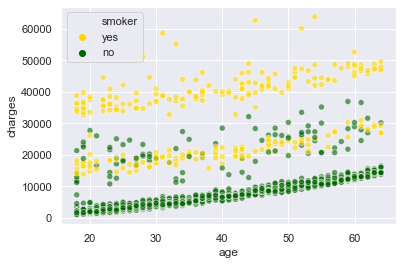

In [17]:
# Here scatter plot function from seaborn package is used to plot the relationship between two attributes.
sns.scatterplot(df['age'], df['charges'],hue=df['smoker'],palette= ['gold','darkgreen'] ,alpha=0.6)

##### Infernce on the above output:
1. As the age increses charges also gradually increases but the charges increased for people who smoke is greater than for people who dont smoke.

2. Within a particular age and people who smoke or who dont smoke, it can be noticed there is difference in the charges which may be due to the effect of other attrributes but our objective is not exploring this scenario. 

 Therefore, from the first point its infered that there is difference in charges between people who smoke and who don't smoke, to prove it statistically signficant we use hypothesis testing.

#### Hypothesis Testing:

#### Step 1: Creating Hypothesis:
H0 (Null Hypothesis) : Charges of people who smoke and who don't smoke are same.

Ha (Alternate Hypothesis) : Charges of people who smoke and who don't smoke are not same.

#### Step 2: Determine level of significance (alpha value):
alpha value = 0.05.

#### Step 3: Determine Test Statistic:
 Here Independent t test of two sample means, justifications:
 1. t-test is used because there is no information on population standard deviation.
 2. Independent t-test because samples(charges on smoked people and charge on people who dont smoke) are not the same people/specimen, therefore two samples are no way related to each other they are Independent.
 3. The test also assumes standard deviations are same.
 4. And based on test of equality of variances (shown below) the test is progressed as "Independent T-test of two sample means with equal variances".

In [24]:
a1=df[df['smoker']=='yes']['charges'] # Extracting the Charges of pepole who smoke.
b1=df[df['smoker']=='no']['charges'] # Extracting the Charges of pepole who don't smoke.

# Testing the variances of two sample with level of signicance 0.05.
#a1 is the sample of charges of people who smoke.
#b1 is the sample of charges of people who dont smoke.
#a1, b1 values are shown in upcoming cells.
stats.levene(a1,b1)

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)

In [25]:
a1

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [26]:
b1

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

##### Infernce on the above output:
1. The probablity value p is greater than alpha therefore the two samples have equal variances.
2. As there is no much difference between the variances of the samples therefore the function ttest_ind is used here orelse Welch's t-test would have been used here.
3. Here the standard deviation of the samples are assumed to be equal, therefore the function(ttest_ind) used here is assuming no differences in standard deviation between two samples orelse we might have used "stats.ttest_ind_from_stats(mean1,std1,nobs1,mean2,std2,nobs2,equal_var=True)" as function.

 therefore, Independent test of two sample means is progressed with this proof.

#### Step 4: Determine p-value:
 Here probablity value is obtained as shown below to make decision on rejection or Fail to reject the null hyothesis. 

In [27]:
#Using the ttest_ind function from seaborn package to analyze statistical significance.    
t1,p1=stats.ttest_ind(a1,b1) # Standard deviation and Variance is assumed to be equal.
print("\n")
print(f'test_stat_value = {t1}, probablity_value = {p1}')
print("\n")
print("Inferences on the above output:")
print("\n")
if p1<0.05: #Taking the leve of significance as 0.05 inturn the confidence interval is 95%
    
    print(f"Inference 1: H0 is rejected because problity value({p1}) of the test is less than the alpha(0.05). Therefore, Charges of people who smoke and who don't smoke are not same." )
    print("\n")
    print(f'Inference 2: As the magnitude of T({t1.round(2)} standard deviations) is larger there is significant difference between the charges of   two categories, also beacause of this the probablity of obtaining the t value of({t1.round(2)} or higher than this) when sampling from same populations is lower (only {p1}) indicating that there is significant difference between the charges.')
else:
     print(f"Inference 1: H0 is failed to reject because problity value({p1}) of the test is greater than the alpha(0.05).Therefore, Charges of people who smoke and who don't smoke are same." )
    
     print(f'Inference 2: As the magnitude of T({t1.round(2)} standard deviations) is smaller(approaching zero) there is no significant difference between the charges of two categories, also beacause of this the probablity of obtaining the t value of({t1.round(2)} or lower than this) when sampling from same populations is higher (only {p1}) indicating that there is  no significant difference between the charges.')



test_stat_value = 46.664921172723716, probablity_value = 8.271435842177219e-283


Inferences on the above output:


Inference 1: H0 is rejected because problity value(8.271435842177219e-283) of the test is less than the alpha(0.05). Therefore, Charges of people who smoke and who don't smoke are not same.


Inference 2: As the magnitude of T(46.66 standard deviations) is larger there is significant difference between the charges of   two categories, also beacause of this the probablity of obtaining the t value of(46.66 or higher than this) when sampling from same populations is lower (only 8.271435842177219e-283) indicating that there is significant difference between the charges.


#### Simple answer: Charges of people who smoke differ significantly from people who don't smoke.

================================================================================================================

#### b. Does bmi of males differ significantly from that of females? (7 marks)

In [62]:
df.sex.value_counts()   #Checking the sample size of males and females.

male      676
female    662
Name: sex, dtype: int64

##### Infernce on the above output:
   The sample sizes are not same for both the categories. 

 First let us visualize the relationship visually using the scatter plot to know whether there is difference bmi of males and females.

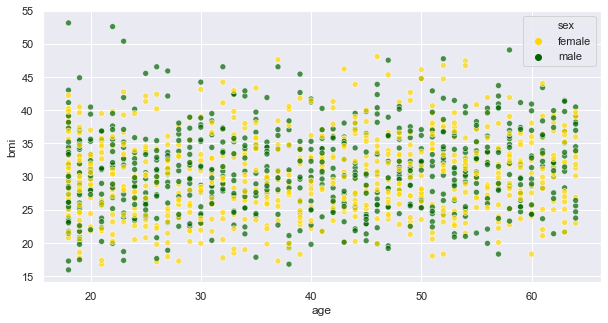

In [130]:
# Here scatter plot function from seaborn package is used to plot the relationship between two attributes.
plt.figure(figsize=(10,5))
sns.scatterplot(df['age'], df['bmi'],hue=df['sex'],palette=['gold','darkgreen'], alpha=0.7)

##### Infernce on the above output:
1. There is no trend and plot is also scattered a lot to interpret visually that whether there is difference between bmi of male and female.
 Therefore, hypothesis testing is used to identify statistically signofocant result.

#### Hypothesis Testing:

#### Step 1: Creating Hypothesis:
H0 (Null Hypothesis)     : BMI of males and female are equal.

Ha (Alternate Hypothesis): BMI of males and females are not equal. 

###### Notes:
As the question is "Does bmi of males differ significantly from that of females?" there is no mention of wheteher bmi of male to be significantly greater or lesser than females bmi so the hypothesis is tested as two tailed test. 

#### Step 2: Determine level of significance (alpha value):
alpha value = 0.05.

#### Step 3: Determine Test Statistic:
 Here Independent t test of two sample means is used:
 1. t-test is used because there is no information on population standard deviation.
 2. Independent t-test because samples(BMI of Males and Females) are not the same because one sample is male and other is female, therefore two samples are no way related to each other they are Independent.
 3. The Independent test that will be used here assumes standard deviations are same.
 3. And based on test of equality of variances (shown below) the test is progressed as "Independent T-test of two sample means with equal variances".

In [17]:
a2=df[df['sex']=='male']['bmi'] # Extracting the bmi of male.
b2=df[df['sex']=='female']['bmi'] # Extracting the bmi of female.

# Testing the variances of two sample with level of signicance 0.05.
#a1 is the sample of charges of people who smoke.
#b1 is the sample of charges of people who dont smoke.
#a1, b1 values are shown in upcoming cells.
stats.levene(a2,b2)

LeveneResult(statistic=0.0039394029791134, pvalue=0.949963293424026)

In [18]:
bmi_df=pd.DataFrame()

male_bmi= pd.DataFrame({'Variance': df[df['sex']=='male']['bmi'].var(),'Std_Dev': df[df['sex']=='male']['bmi'].std() },index=['Male_bmi'])
female_bmi= pd.DataFrame({'Variance': df[df['sex']=='female']['bmi'].var(),'Std_Dev': df[df['sex']=='female']['bmi'].std() },index=['Female_bmi'])

bmi_df=bmi_df.append(male_bmi)
bmi_df=bmi_df.append(female_bmi)
bmi_df

,Variance,Std_Dev
Male_bmi,37.704937,6.140435
Female_bmi,36.554395,6.046023


##### Infernce on the above output:
1. The probablity value p is greater than alpha therefore the two samples have equal variances.
2. The above table also shows that there is no much difference between the variances of the samples therefore the function(ttest_ind) used here orelse Welch's t-test would have been used here.
3. The above table also shows that there is no much difference between the standard deviation of the samples, therefore the function(ttest_ind) used here is assuming no differences in standard deviation between two samples orelse we might have used "stats.ttest_ind_from_stats(mean1,std1,nobs1,mean2,std2,nobs2,equal_var=True)" as function.

 therefore, Independent test of two sample means is progressed with this proof.

#### Step 4: Determine p-value:
 Here probablity value is obtained as shown below to make decision on rejection or Fail to reject the null hyothesis. 

In [19]:
a2

1       33.770
2       33.000
3       22.705
4       28.880
8       29.830
         ...  
1324    25.935
1325    33.535
1327    30.030
1329    38.600
1333    30.970
Name: bmi, Length: 676, dtype: float64

In [121]:

b2

0       27.90
5       25.74
6       33.44
7       27.74
9       25.84
        ...  
1332    44.70
1334    31.92
1335    36.85
1336    25.80
1337    29.07
Name: bmi, Length: 662, dtype: float64

In [21]:
#Using the ttest_ind function from seaborn package to analyze statistical significance.  
t2,p2=stats.ttest_ind(a2,b2) # Standard deviation and Variance is assumed to be equal 
print("\n")
print(f'test_stat_value = {t2}, probablity_value = {p2}')
print("\n")
print("Inferences on the above output:")
print("\n")
if p2<0.05: #Taking the leve of significance as 0.05 inturn the confidence interval is 95%
    
    print(f'Inference 1: H0 is rejected because problity value({p2}) of the test is less than the alpha(0.05). Therefore, BMI of Males and Females are not equal' )
    print("\n")
    print(f'Inference 2: As the magnitude of T({t2.round(2)} standard deviations) is larger there is significant difference between the BMI of   Males and Females (evidence against the null), also beacause of this the probablity of obtaining the t value of({t2.round(2)} or higher than this) when sampling from same populations is lower (only {p2}) indicating that there is significant difference between the BMI of Males and females.')
else:
     print(f'Inference 1: H0 is failed to reject because problity value({p2}) of the test is greater than the alpha(0.05). Therefore, BMI of Males and Females are equal' )
    
     print('\n'f'Inference 2: As the magnitude of T({t2.round(2)} standard deviations) is smaller(approaching zero) there is no significant difference between the BMI of Males and females, also beacause of this the probablity of obtaining the t value of({t2.round(2)} or lower than this) when sampling from same populations is higher (only {p2}) indicating that there is  no significant difference BMI of Males and females.')



test_stat_value = 1.696752635752224, probablity_value = 0.08997637178984932


Inferences on the above output:


Inference 1: H0 is failed to reject because problity value(0.08997637178984932) of the test is greater than the alpha(0.05). Therefore, BMI of Males and Females are equal

Inference 2: As the magnitude of T(1.7 standard deviations) is smaller(approaching zero) there is no significant difference between the BMI of Males and females, also beacause of this the probablity of obtaining the t value of(1.7 or lower than this) when sampling from same populations is higher (only 0.08997637178984932) indicating that there is  no significant difference BMI of Males and females.


#### Simple answer: BMI of Males and Females are equal.

================================================================================================================

#### c. Is the proportion of smokers significantly different in different genders? (7 marks)

Here we need to test whether the number of male smokers in male population (Proportion 1) and number of female smokers in the female popualtions (Proportion 2) are significantly different are not.


 First let us visualize the Proportionality visually using the box plot.

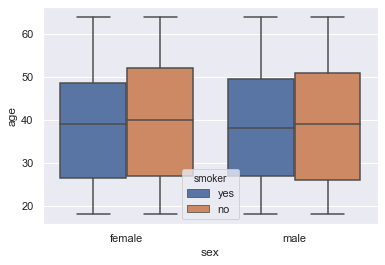

In [10]:
sns.boxplot(df['sex'],df['age'],hue=df['smoker'])

##### Inference on above plot:
       Visually it seems the proportions are not same.

#### Step 1: Finding whether there is difference in the Proportions:

In [28]:
n_ma=df['sex'].value_counts()['male']                    # Extracting number of males from the entire population.
ma=df[df['sex']=='male']['smoker'].value_counts()['yes'] # Extracting the number of male smokers from the entire male population.

n_fm=df['sex'].value_counts()['female']                    # Extracting number of females from the entire population.
fm=df[df['sex']=='female']['smoker'].value_counts()['yes'] # Extracting the number of female smokers from the entire female population.

In [29]:
print(f' Proportion of smokers in females, males = {round(ma/n_ma,2)}%, {round(fm/n_fm,2)}% respectively' ) #Determining the Proportion of the two different criterias.

 Proportion of smokers in females, males = 0.24%, 0.17% respectively


##### Infernce on the above output:
1. It can be forund that the values of two proportions are different. 

Therefore it should be tested whether they are statistically significant are not. In order to test statistical significance hypothesis testing is carried out as follows.

#### Step 2: Creating Hypothesis:
H0 (Null Hypothesis)     : Proportion of male smokers and Proportion of female smokers are equal.

Ha (Alternate Hypothesis): Proportion of male smokers and Proportion of female smokers are not equal.


#### Step 3: Determine level of significance (alpha value):
alpha value = 0.05.

#### Step 4: Determine Test Statistic:
 Type of test statistic that can be used to prove the statisticall significance for this problem are:

1. Proportion Z test - Z Stat.
2. Chi- Square independent test - Chi Stat.

#### Step 5: Determine p-value:
 Here probablity value is obtained as shown below to make decision on rejection or Fail to reject the null hyothesis. 

#### 1. Proportion Z test.

In [30]:
z,p3=proportions_ztest([ma,fm],[n_ma,n_fm])
print('\n')
print(f'Z_stat = {z}, p_value = {p3}')
print("\n")
print("Inferences on the above output:")
print("\n")
if p3<0.05: #Taking the leve of significance as 0.05 inturn the confidence interval is 95%
    
    print(f'Inference 1: H0 is rejected because problity value({p3}) of the test is less than the alpha(0.05). Therefore, Proportion of male smokers and Proportion of female smokers are not equal. ' )
    print("\n")
    print(f'Inference 2: As the magnitude of z({z.round(2)} standard deviations) is larger there is significant difference between proportion of   Males and Female smokers (evidence against the null), also beacause of this the probablity of obtaining the z value of({z.round(2)} or higher than this) when sampling from same populations is lower (only {p3}) indicating that there is significant difference between the proportion of of Male and female smokers.')
else:
     print(f'Inference 1: H0 is failed to reject because problity value({p3}) of the test is greater than the alpha(0.05).  Therefore, Proportion of male smokers and Proportion of female smokers are equal.' )
   
     print(f'Inference 2: As the magnitude of z({z.round(2)} standard deviations) is smaller there is no significant difference between proportion of   Males and Female smokers, also beacause of this the probablity of obtaining the z value of({z.round(2)} or lower than this) when sampling from same populations is higher (only {p3}) indicating that there is no significant difference between the proportion of Male and female smokers.')



Z_stat = 2.7867402154855503, p_value = 0.005324114164320532


Inferences on the above output:


Inference 1: H0 is rejected because problity value(0.005324114164320532) of the test is less than the alpha(0.05). Therefore, Proportion of male smokers and Proportion of female smokers are not equal. 


Inference 2: As the magnitude of z(2.79 standard deviations) is larger there is significant difference between proportion of   Males and Female smokers (evidence against the null), also beacause of this the probablity of obtaining the z value of(2.79 or higher than this) when sampling from same populations is lower (only 0.005324114164320532) indicating that there is significant difference between the proportion of of Male and female smokers.


#### Simple answer: Proportion of smokers is significantly different in different genders.

#### 2. Chi Squared independent test.

In [52]:
cont_table = pd.crosstab(df['sex'],df['smoker'])  # Creating contigency table for two categorical variables (gender and smoker) to identify whether these two attributes are dependent are not.
print('\n')
print(cont_table)

chi, p4, dof, exp =  stats.chi2_contingency(cont_table)
print('\n')
print(f'chi_stat = {chi.round(2)}, p_value = {p4.round(2)}, degree_of_freedom = {dof}')
print('\n')
print(f'expected_value= {exp.round(2)}')
print('\n')
print("Inferences on the above output:")
print("\n")
if p4<0.05: #Taking the leve of significance as 0.05 inturn the confidence interval is 95%
    
    print(f'Inference:H0 is rejected because problity value({p4}) of the test is less than the alpha(0.05). Therefore, Proportion of male smokers and Proportion of female smokers are not equal.' )
else:
     print(f'Inference:H0 is failed to reject because problity value({p4}) of the test is greater than the alpha(0.05). Therefore, Proportion of male smokers and Proportion of female smokers are equal.' )




smoker   no  yes
sex             
female  547  115
male    517  159


chi_stat = 7.39, p_value = 0.01, degree_of_freedom = 1


expected_value= [[526.43 135.57]
 [537.57 138.43]]


Inference:H0 is rejected because problity value(0.006548143503580696) of the test is less than the alpha(0.05). Therefore, Proportion of male smokers and Proportion of female smokers are not equal.


#### Simple answer: BMI of Males and Females are equal.

================================================================================================================

#### d. Is the distribution of bmi across women with no children, one child and two children, the same? (7 marks)

Text(0.5, 0, 'female with no.of children')

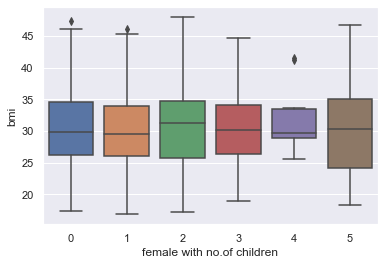

In [57]:
x=df[df['sex']=='female']['children']
y=df['bmi']
sns.boxplot(x,y)
plt.xlabel('female with no.of children')

##### Inference on above plot:
 Distribution of BMI among women with different number of children seem to be with variation to some extent. 

Let see whether they are statistically signicant using one-way-ANOVA. 
One - way ANOVA becausse it is the comparision between three different groups.

#### Step 1: Stateing the null and alternative hypothesis:

* $H_0$: Effect of BMI across women with no, one and two children are equal.
* $H_A$: Effect of BMI across women with no, one and two children are not equal.



#### Step 2: Determine level of significance (alpha value):
alpha value = 0.05.

#### Step 3: Determine Test Statistic:
Here we have three groups.  ANOVA uses F-tests to statistically test the effect of BMI on all three groups

#### Step 4: Determine p value:

Initally grouping the different categories as shown below.

In [44]:
# Group0 (G0) - BMI value of women with zero Children.
G_0=df[df['sex']=='female']
G0 = G_0[G_0['children']== 0].bmi.values
print(f'BMI value of women with zero Children:{G0}' )

BMI value of women with zero Children:[27.9   25.74  25.84  26.29  39.82  36.005 23.085 26.315 26.6   34.77
 24.53  35.625 22.42  28.9   36.19  24.75  39.805 32.965 38.285 31.16
 27.2   27.74  26.98  39.49  31.6   30.115 35.72  27.17  28.975 28.785
 28.3   37.4   26.505 22.04  28.785 28.05  36.    23.37  26.6   36.85
 33.345 37.7   38.28  26.41  26.2   32.8   18.05  39.33  32.11  24.035
 36.08  31.8   26.6   23.21  33.25  41.91  17.8   26.73  27.74  38.06
 40.15  25.2   24.3   31.2   26.22  33.4   28.82  24.7   31.4   27.645
 31.16  28.785 27.6   27.55  23.18  25.6   27.7   38.28  20.79  21.7
 21.09  22.23  28.31  39.05  22.61  37.43  38.17  20.6   32.965 24.31
 35.15  26.98  29.165 30.5   33.5   33.1   25.65  29.6   30.495 30.115
 29.8   33.345 31.35  31.065 38.06  32.9   25.08  25.08  39.2   25.27
 28.7   27.36  44.22  33.915 37.73  33.88  31.73  36.3   47.41  28.595
 46.2   28.93  41.325 32.68  30.495 29.1   27.17  23.465 35.91  29.
 39.16  25.3   28.31  34.1   25.175 23.655 33.155 

In [40]:
# Group1 (G1) - BMI value of women with zero Children.
G_1=df[df['sex']=='female']
G1 = G_1[G_1['children']== 1].bmi.values
print(f'BMI value of women with one Children:{G1}' )

BMI value of women with one Children:[33.44  30.78  32.4   31.92  22.88  25.935 29.59  24.795 37.62  27.5
 28.4   27.94  37.73  37.43  25.46  31.825 34.8   32.2   26.6   32.23
 28.88  26.73  29.92  33.7   31.635 36.195 22.135 26.8   26.84  21.56
 28.12  32.395 36.765 28.88  33.33  23.21  33.8   36.385 27.72  29.92
 26.4   30.78  33.155 23.6   20.235 35.64  27.265 16.815 32.68  36.52
 28.38  28.7   24.32  24.09  39.5   28.93  31.    25.8   28.05  40.565
 37.29  36.86  38.095 23.65  28.27  30.21  30.69  21.85  33.725 33.25
 29.37  36.63  21.3   24.51  39.6   42.4   35.91  23.98  31.54  29.81
 17.4   18.5   24.1   34.8   26.41  29.545 22.61  27.075 21.755 36.08
 27.265 34.77  30.115 36.    29.    27.6   29.26  22.895 26.18  41.42
 26.125 34.2   32.23  29.48  27.1   32.34  27.5   34.21  20.1   32.5
 46.09  35.8   28.405 39.615 35.2   30.59  25.8   27.645 19.8   24.605
 45.32  23.655 30.495 22.515 36.955 25.3   31.9   29.59  32.    33.99
 32.3   32.395 42.75  25.    35.815 34.58  28.31  34.

In [43]:
# Group2 (G2) - BMI value of women with zero Children.
G_2=df[df['sex']=='female']
G2 = G_2[G_2['children']== 2].bmi.values
print(f'BMI value of women with two Children:{G2}' )

BMI value of women with two Children:[32.775 36.63  30.8   38.665 33.63  31.825 37.335 39.1   34.8   31.3
 29.7   23.37  17.765 35.9   29.8   28.9   29.92  32.11  28.6   30.9
 37.1   22.22  36.67  32.2   26.6   48.07  37.51  33.    38.    27.5
 33.06  35.72  32.3   21.89  24.985 17.955 43.34  32.3   38.38  17.195
 22.6   20.235 30.14  38.095 33.82  23.6   23.98  30.59  30.2   31.79
 46.7   31.73  19.95  32.12  43.12  34.295 29.48  37.525 34.8   38.095
 42.68  36.3   25.3   32.775 43.89  23.18  32.3   39.27  32.9   23.54
 30.685 36.67  34.58  25.175 19.475 26.7   31.92  29.81  31.825 23.845
 23.465 32.78  23.75  47.6   33.535 29.5   20.045 29.355 23.4   27.835
 31.6   34.2   32.68  17.29  24.7   28.88  30.495 34.96  19.095 26.22
 35.86  23.18  24.6   26.7   32.775 25.8   34.8   33.3   27.83  33.345
 26.79  27.645 19.95  26.51  34.7   26.315 40.37  24.225 25.74 ]


In [45]:
#Performing One-way ANOVA using f_onway() function from scipy package:
f_stat, p_value = stats.f_oneway(G0,G1,G2)
print('\n')
print(f'f_stat = {f_stat}, p_value ={p_value}')
print('\n')   
print("Inferences on the above output:")
print("\n")
if p_value<0.05: #Taking the leve of significance as 0.05 inturn the confidence interval is 95%
    
    print(f'Inference:H0 is rejected because problity value({p_value.round(2)}) of the test is less than the alpha(0.05). Therefore, distribution of BMI across women with no, one and two children are not equal("No. of children has an effect on bmi").' )
else:
     print(f'Inference:H0 is failed to reject because problity value({p_value.round(2)}) of the test is greater than the alpha(0.05). Therefore, distribution of BMI across women with no, one and two children are equal ("No. of children has no effect on bmi").' )




f_stat = 0.3344720147757968, p_value =0.7158579926754841


Inferences on the above output:


Inference:H0 is failed to reject because problity value(0.72) of the test is greater than the alpha(0.05). Therefore, distribution of BMI across women with no, one and two children are equal ("No. of children has no effect on bmi").


#### Simple answer: The distribution of bmi across women with no children, one child and two children are same. (No. of children has no effect on bmi)

================================================================================================================